In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3*X[:,0]**2+0.05 * np.random.randn(100)

In [7]:
df = pd.DataFrame()

In [11]:
df['X'] = X.reshape(100)
df['y'] = y

In [13]:
df

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'X vs Y')

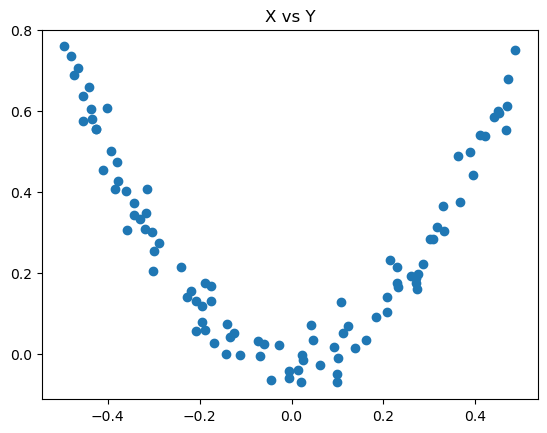

In [15]:
plt.scatter(df['X'], df['y'])
plt.title('X vs Y')

In [25]:
df['pred1'] = df['y'].mean()

In [27]:
df

,X,y,y_pred,res1,pred1
0,-0.125460,0.051573,0.265458,-0.213885,0.265458
1,0.450714,0.594480,0.265458,0.329021,0.265458
2,0.231994,0.166052,0.265458,-0.099407,0.265458
3,0.098658,-0.070178,0.265458,-0.335636,0.265458
4,-0.343981,0.343986,0.265458,0.078528,0.265458
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.265458
96,0.022733,-0.002305,0.265458,-0.267763,0.265458
97,-0.072459,0.032809,0.265458,-0.232650,0.265458
98,-0.474581,0.689516,0.265458,0.424057,0.265458


In [29]:
df['res1'] = df['y'] - df['pred1']

In [31]:
df

,X,y,y_pred,res1,pred1
0,-0.125460,0.051573,0.265458,-0.213885,0.265458
1,0.450714,0.594480,0.265458,0.329021,0.265458
2,0.231994,0.166052,0.265458,-0.099407,0.265458
3,0.098658,-0.070178,0.265458,-0.335636,0.265458
4,-0.343981,0.343986,0.265458,0.078528,0.265458
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.265458
96,0.022733,-0.002305,0.265458,-0.267763,0.265458
97,-0.072459,0.032809,0.265458,-0.232650,0.265458
98,-0.474581,0.689516,0.265458,0.424057,0.265458


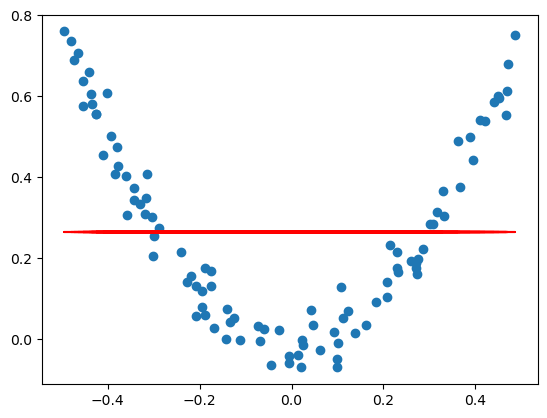

In [35]:
plt.scatter(df['X'], df['y'])
plt.plot(df['X'], df['pred1'], c = 'red')

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [43]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

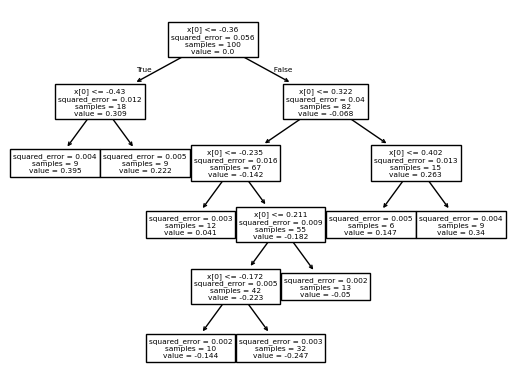

In [47]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [49]:
#generating x_test
X_test = np.linspace(-0.5,0.5,500)

In [51]:
y_pred = 0.265458 + tree1.predict(X_test.reshape(500,1))

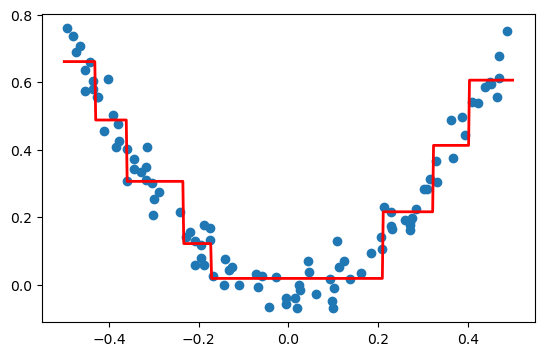

In [53]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2, color='red')
plt.scatter(df['X'],df['y'])

In [55]:
df['pred2'] = 0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [57]:
df

,X,y,y_pred,res1,pred1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.265458,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.265458,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.265458,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.265458,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.265458,0.305964
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.265458,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.265458,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.265458,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.265458,0.660912


In [59]:
df['res2'] = df['y'] - df['pred2']

In [61]:
df

,X,y,y_pred,res1,pred1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.265458,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.265458,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.265458,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.265458,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.265458,0.305964,0.038022
...,...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.265458,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.265458,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.265458,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.265458,0.660912,0.028604


In [63]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)

In [65]:
tree2.fit(df['X'].values.reshape(100,1), df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [67]:
y_pred = 0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

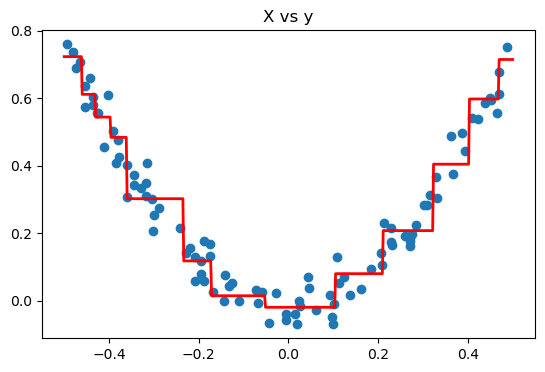

In [69]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test, y_pred, linewidth=2,c='red')
plt.scatter(df['X'], df['y'])
plt.title('X vs y')

In [81]:
def gradient_boost(X,y,number, lr, count=1, regs=[],foo=None):

    if number == 0:
        return
    else:
        #Do gradient Boosting

        if count > 1:
            y = y - regs[-1].predict(X)
        else:
            foo=y
        tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
        tree_reg.fit(X,y)

        regs.append(tree_reg)

        x1 = np.linspace(-0.5, 0.5, 500)
        y_perd = sum(lr * regressor.predict(x1.reshape(-1,1)) for regressor in regs)

        print(number)
        plt.figure()
        plt.plot(x1, y_pred, linewidth = 2)
        plt.plot(X[:,0], foo,"r.")
        plt.show()

        gradient_boost(X,y,number-1,lr,count+1,regs,foo=foo)


5


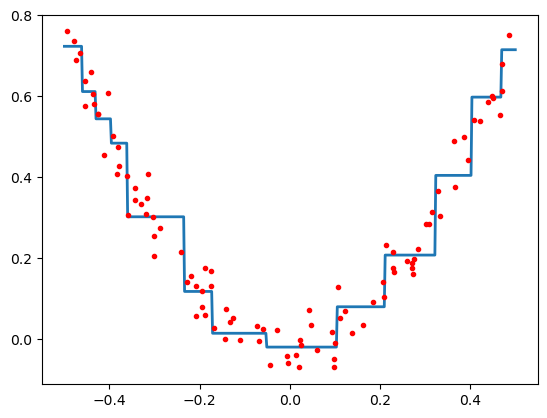

4


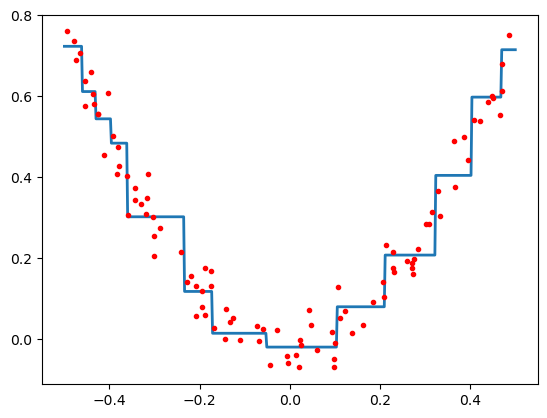

3


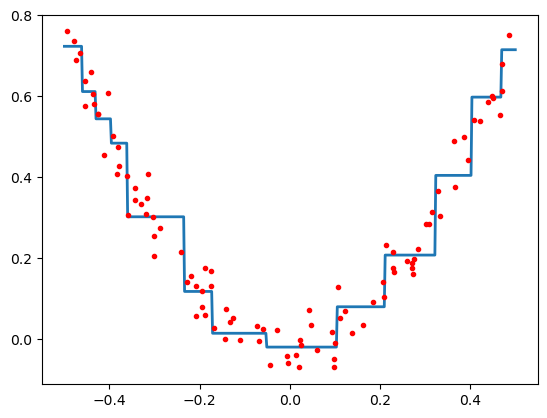

2


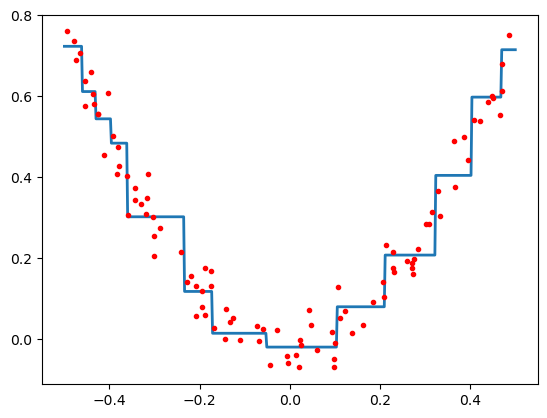

1


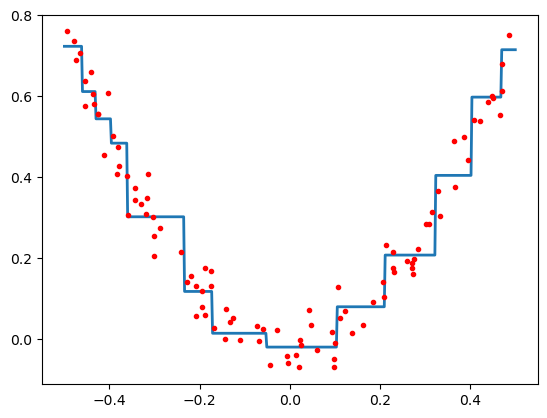

In [83]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
gradient_boost(X,y, 5, lr=1)